# Predict the percentage of marks that a student is expected to score based                              upon the number of hours they studied.

# ...........................................................................................................................

Step 1: Importing   the   libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,6


.

Step 2 :Importing Dataset(Given by Sparks Foundation)

In [ ]:
data_url = 'http://bit.ly/w-data'
mydata = pd.read_csv(data_url)

In [ ]:
mydata.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
mydata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


.

Step 3 : Analysis

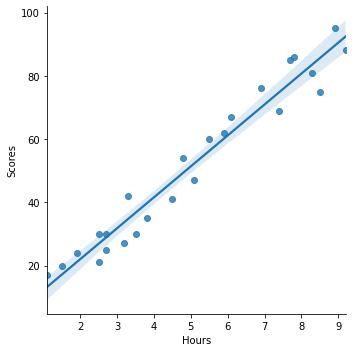

In [ ]:
sns.lmplot(x ="Hours" , y = "Scores", data = mydata )
plt.show()

Interpretation:From above graph we can interprete that  there is a positive linear relation between the number of hours studied and percentage of score ie. if you spent more time on study you will increase your marks.

.

Step 4: Checking Null Values

In [ ]:
mydata.isnull().sum()

Hours     0
Scores    0
dtype: int64

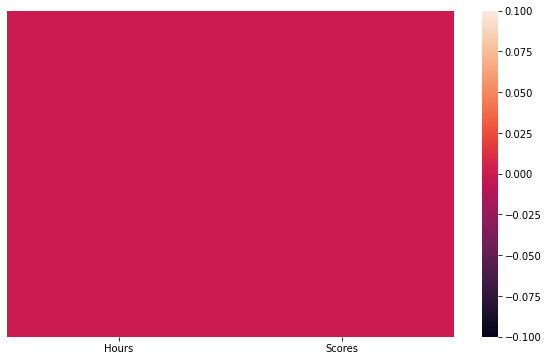

In [ ]:
sns.heatmap(mydata.isnull() , yticklabels = False)
plt.show()

Great!!! 
Our data is already clean.

.

Step 5: Preparing Data

In [ ]:
X = mydata.iloc[:,:-1].values
y = mydata.iloc[:,1].values


.

Step 6: Split data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

.

Step 7: Training the data(We are going to aplly Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

.

Step 8 : To retrieve the Intercept and Slop
    

In [ ]:
print(regressor.intercept_)

1.9322042531516601


In [ ]:
print(regressor.coef_)

[9.94167834]


.

Step 9 : Ploting Regression Line and ploting for test data

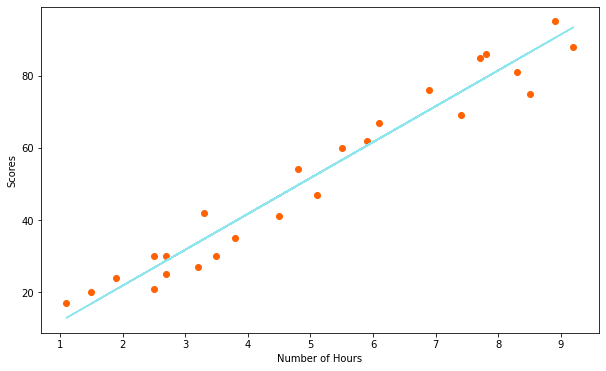

In [ ]:
line = (regressor.coef_ * X) + regressor.intercept_

plt.plot(X, line, color = "#8EE5EE" , label = "Regression Line")
plt.scatter(X,y,c = "#FF6103" , label = "Scatter Plot")
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.show()

.

Step 10 : Making Predictions

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted'  :y_pred })

In [ ]:
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Step 11: Evaluating the Algorithm

In [ ]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
Root Mean Squared Error: 4.509204328368805


Here we can see that the value of root mean squared error is 4.509, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a graet job.

.

# Step 12 : What will be predicted score if a student study for 9.25 hrs in a day?

In [ ]:
hours = 9.25
own_prediction = regressor.predict([[hours]])
print("Number of hours = {}".format(hours))
print("Prediction Score = {}".format(own_prediction[0]))

Number of hours = 9.25
Prediction Score = 93.89272889341652


Conclusion: From above result we can say that if student study 9.25 hrs. then student get 93.89 Marks

# Thankyou!!!